# Data preprocessing and visualisation of a credit scoring dataset

We'll work on a dataset `gro.csv` for **credit scoring** that was proposed some years ago as a data challenge on some data challenge website.
It is a realistic and somewhat messy dataset that contains a lot of missing values, several types of features (dates, categories, continuous features), so that serious data cleaning and formating is required.
This dataset contains the following columns:

| Column name          | Description |
|:---------------------|:------------|
| BirthDate            | Date of birth of the client |
| Customer_Open_Date   | Creation date of the client's first account at the bank |
| Customer_Type        | Type of client (existing / new) | 
| Educational_Level    | Highest diploma |
| Id_Customer          | Id of the client |
| Marital_Status       | Family situation |
| Nb_Of_Products       | Number of products held by the client |
| Net_Annual_Income    | Annual revenue |
| Number_Of_Dependant  | Number of dependents |
| P_Client             | Non-disclosed feature |
| Prod_Category        | Product category |
| Prod_Closed_Date     | Closing date of the last product |
| Prod_Decision_Date   | Decision date of the last agreement for a financing product |
| Prod_Sub_Category    | Sub-category of the product |
| Source               | Financing source (Branch or Sales) |
| Type_Of_Residence    | Residential situation |
| Y                    | Credit was granted (yes / no) |
| Years_At_Business    | Number of year at the current job position |
| Years_At_Residence   | Number of year at the current housing |

# Your job

Read the `gro.csv` dataset and work on it using `pandas`, `matplotlib` and `seaborn`.
- The column separator in the CSV file is not `,` but `;` so you need to use the `sep` option in `pd.read_csv`
- The categorical columns must be imported as `category` type 
- Something weird is going on with the `Net_Annual_Income` column... Try to  understand what is going on and try to correct the problem
- Several columns are empty, we need to remove them (or not even read them)
- Dates must be imported as dates and not strings
- Remove rows with missing values

Many of these things can be done right from the beginning, when reading the CSV file, through some options to the `pd.read_csv` function. You might need to read carefully its documentation in order to understand some useful options. Once you are happy with your importation and cleaning of the data, you can:
- Use `matplotlib` and `pandas` to perform data visualization...
- ... in order to understand visually the impact of some features on `Y` (credit was granted or not). For this, you need to decide on the plots that make sense for this and produce them

We will provide thorough explanations and code that performs all of this in subsequent sessions.

# A quick and easy (but actually bad) import

Let's import the data into a pandas dataframe, as simply as possible
The only thing we care about for now is the fact that the column separator 
is `';'` and not `','` as it should be in a `.csv` file.

In [1]:
import requests
import os

# The path containing your notebook
path_data = './'
# The name of the file
filename = 'gro.csv.gz'

if os.path.exists(os.path.join(path_data, filename)):
    print('The file %s already exists.' % os.path.join(path_data, filename))
else:
    url = 'https://stephanegaiffas.github.io/big_data_course/data/gro.csv.gz'
    r = requests.get(url)
    with open(os.path.join(path_data, filename), 'wb') as f:
        f.write(r.content)
    print('Downloaded file %s.' % os.path.join(path_data, filename))

The file ./gro.csv.gz already exists.


In [2]:
import numpy as np
import pandas as pd

filename = "gro.csv.gz"
df = pd.read_csv(filename, sep=';')
df.head(n=5)

Id_Customer  Y        Customer_Type   BirthDate Customer_Open_Date  \
0         6714  0  Non Existing Client  02/09/1971         18/01/2012   
1         7440  0  Non Existing Client  07/08/1977         13/02/2012   
2          573  0      Existing Client  13/06/1974         04/02/2009   
3         9194  0  Non Existing Client  07/11/1973         03/04/2012   
4         3016  1      Existing Client  08/07/1982         25/08/2011   

    P_Client Educational_Level Marital_Status  Number_Of_Dependant  \
0  NP_Client        University        Married                  3.0   
1  NP_Client        University        Married                  3.0   
2   P_Client        University        Married                  0.0   
3  NP_Client        University        Married                  2.0   
4  NP_Client        University        Married                  3.0   

   Years_At_Residence  ... Prod_Sub_Category  Prod_Decision_Date Source  \
0                  10  ...                 C          23/01/2012  Sales   
1                   1  ...                 C          14/02/2012  Sales   
2                  12  ...                 C          30/06/2011  Sales   
3                  10  ...                 C          04/04/2012  Sales   
4                   3  ...                 C          07/09/2011  Sales   

  Type_Of_Residence Nb_Of_Products Prod_Closed_Date  Prod_Category  \
0             Owned              1              NaN              B   
1             Owned              1              NaN              B   
2           Parents              1              NaN              G   
3             Owned              1              NaN              B   
4          New rent              1       31/12/2012              L   

  Unnamed: 19 Unnamed: 20  Unnamed: 21  
0         NaN         NaN          NaN  
1         NaN         NaN          NaN  
2         NaN         NaN          NaN  
3         NaN         NaN          NaN  
4         NaN         NaN          NaN  

[5 rows x 22 columns]

In [3]:
df.columns

Index(['Id_Customer', 'Y', 'Customer_Type', 'BirthDate', 'Customer_Open_Date',
       'P_Client', 'Educational_Level', 'Marital_Status',
       'Number_Of_Dependant', 'Years_At_Residence', 'Net_Annual_Income',
       'Years_At_Business', 'Prod_Sub_Category', 'Prod_Decision_Date',
       'Source', 'Type_Of_Residence', 'Nb_Of_Products', 'Prod_Closed_Date',
       'Prod_Category', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

**Remark**. There are weird columns in the end, they look empty. 
They don't appear in the description of the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6725 entries, 0 to 6724
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_Customer          6725 non-null   int64  
 1   Y                    6725 non-null   int64  
 2   Customer_Type        6725 non-null   object 
 3   BirthDate            6725 non-null   object 
 4   Customer_Open_Date   6725 non-null   object 
 5   P_Client             6725 non-null   object 
 6   Educational_Level    6725 non-null   object 
 7   Marital_Status       6725 non-null   object 
 8   Number_Of_Dependant  6723 non-null   float64
 9   Years_At_Residence   6725 non-null   int64  
 10  Net_Annual_Income    6722 non-null   object 
 11  Years_At_Business    6721 non-null   float64
 12  Prod_Sub_Category    6725 non-null   object 
 13  Prod_Decision_Date   6725 non-null   object 
 14  Source               6725 non-null   object 
 15  Type_Of_Residence    6725 non-null   o

In [7]:
df["BirthDate"].head()

0    02/09/1971
1    07/08/1977
2    13/06/1974
3    07/11/1973
4    08/07/1982
Name: BirthDate, dtype: object

In [10]:
type(df.loc[0, 'BirthDate'])

str

This means that dates are indeed imported as a strings...

In [11]:
df['Prod_Sub_Category'].head()

0    C
1    C
2    C
3    C
4    C
Name: Prod_Sub_Category, dtype: object

In [12]:
type(df.loc[0, 'Prod_Sub_Category'])

str

Categorical variables are imported as a strings as well

In [13]:
df['Net_Annual_Income'].head(n=10)

0        36
1        36
2        18
3        36
4        36
5    59,916
6        36
7        60
8        36
9        36
Name: Net_Annual_Income, dtype: object

In [14]:
type(df.loc[0, 'Net_Annual_Income'])

str

Net actual income is a string as well ! While it is clearly a number !!!

In [15]:
df.describe(include='all')

Id_Customer            Y        Customer_Type   BirthDate  \
count   6725.000000  6725.000000                 6725        6725   
unique          NaN          NaN                    2        5224   
top             NaN          NaN  Non Existing Client  01/01/1973   
freq            NaN          NaN                 4214           8   
mean    4821.029740     0.072862                  NaN         NaN   
std     2775.505395     0.259930                  NaN         NaN   
min        1.000000     0.000000                  NaN         NaN   
25%     2399.000000     0.000000                  NaN         NaN   
50%     4822.000000     0.000000                  NaN         NaN   
75%     7209.000000     0.000000                  NaN         NaN   
max     9605.000000     1.000000                  NaN         NaN   

       Customer_Open_Date   P_Client Educational_Level Marital_Status  \
count                6725       6725              6725           6725   
unique               1371          2                 4              5   
top            12/12/2011  NP_Client        University        Married   
freq                   50       6213              5981           5268   
mean                  NaN        NaN               NaN            NaN   
std                   NaN        NaN               NaN            NaN   
min                   NaN        NaN               NaN            NaN   
25%                   NaN        NaN               NaN            NaN   
50%                   NaN        NaN               NaN            NaN   
75%                   NaN        NaN               NaN            NaN   
max                   NaN        NaN               NaN            NaN   

        Number_Of_Dependant  Years_At_Residence  ... Prod_Sub_Category  \
count           6723.000000         6725.000000  ...              6725   
unique                  NaN                 NaN  ...                 3   
top                     NaN                 NaN  ...                 C   
freq                    NaN                 NaN  ...              5783   
mean               1.051614           12.564758  ...               NaN   
std                1.332712            9.986257  ...               NaN   
min                0.000000            0.000000  ...               NaN   
25%                0.000000            4.000000  ...               NaN   
50%                0.000000           10.000000  ...               NaN   
75%                2.000000           17.000000  ...               NaN   
max               20.000000           73.000000  ...               NaN   

        Prod_Decision_Date Source Type_Of_Residence Nb_Of_Products  \
count                 6725   6725              6725    6725.000000   
unique                 278      2                 5            NaN   
top             06/12/2011  Sales             Owned            NaN   
freq                    58   5149              5986            NaN   
mean                   NaN    NaN               NaN       1.086840   
std                    NaN    NaN               NaN       0.295033   
min                    NaN    NaN               NaN       1.000000   
25%                    NaN    NaN               NaN       1.000000   
50%                    NaN    NaN               NaN       1.000000   
75%                    NaN    NaN               NaN       1.000000   
max                    NaN    NaN               NaN       3.000000   

       Prod_Closed_Date  Prod_Category Unnamed: 19 Unnamed: 20  Unnamed: 21  
count              1434           6725         0.0         0.0          0.0  
unique              349             13         NaN         NaN          NaN  
top          30/05/2013              B         NaN         NaN          NaN  
freq                116           3979         NaN         NaN          NaN  
mean                NaN            NaN         NaN         NaN          NaN  
std                 NaN            NaN         NaN         NaN          NaN  
min                 NaN   

## Let's assess what we did

It appears that we have to work a little bit more for a correct import of the data.
Here is a list of the problems we face.
- The last three columns are empty
- Dates are actually `str` (python's **string** type)
- There is a lot of missing values
- Categorial features are `str`
- The `Net_Annual_Income` is imported as a string

By looking at the column names, the descriptions of the columns and using some basic, we infer the type of features that we have.
There are dates features, continuous features, categorical features, and
some features that could be either treated as categorical or continuous.

- There is **a lot** of missing values, that need to be handled somehow.
- The annual net income is imported as a string, we need to understand why.
- We really need to treat dates as dates and not string (because we'd want to compute the age of a client based on its birth year for instance).

Here is a tentative structure of the features

**Continuous features**
- `Years_At_Residence`
- `Net_Annual_Income`
- `Years_At_Business`

**Features to be decided**

- `Number_Of_Dependant`
- `Nb_Of_Products`

**Categorical features**

- `Customer_Type`
- `P_Client`
- `Educational_Level`
- `Marital_Status`
- `Prod_Sub_Category`
- `Source`
- `Type_Of_Residence`
- `Prod_Category`

**Date features**

- `BirthDate`
- `Customer_Open_Date`
- `Prod_Decision_Date`
- `Prod_Closed_Date`

# A closer look at the import problems

Let's find solutions to all these import problems.

## The last three columns are weird and empty 

It seems to come from the fact that the data always ends with several `';'` characters. 
We can remove them simply using the `usecols` option from `read_csv`.

## Dates are actually `str`

We need to specify which columns must be encoded as dates using the `parse_dates` option from `read_csv`.
Fortunately enough, `pandas` is clever enough to interpret the date format.

In [16]:
type(df.loc[0, 'BirthDate'])

str

## There is a lot of missing values 

We'll see below that actually a single column mostly contain missing values.

In [17]:
df.isnull().sum()

Id_Customer               0
Y                         0
Customer_Type             0
BirthDate                 0
Customer_Open_Date        0
P_Client                  0
Educational_Level         0
Marital_Status            0
Number_Of_Dependant       2
Years_At_Residence        0
Net_Annual_Income         3
Years_At_Business         4
Prod_Sub_Category         0
Prod_Decision_Date        0
Source                    0
Type_Of_Residence         0
Nb_Of_Products            0
Prod_Closed_Date       5291
Prod_Category             0
Unnamed: 19            6725
Unnamed: 20            6725
Unnamed: 21            6725
dtype: int64

The column `Prod_Closed_Date` contains mostly missing values !

In [18]:
df[['Prod_Closed_Date']].head(5)

Prod_Closed_Date
0              NaN
1              NaN
2              NaN
3              NaN
4       31/12/2012

Let's remove the useless columns and check the remaining missing values

In [20]:
df.drop(['Prod_Closed_Date', 'Unnamed: 19', 
         'Unnamed: 20', 'Unnamed: 21'], axis="columns", inplace=True)

KeyError: "['Prod_Closed_Date' 'Unnamed: 19' 'Unnamed: 20' 'Unnamed: 21'] not found in axis"

In [22]:
df.head()

Id_Customer  Y        Customer_Type   BirthDate Customer_Open_Date  \
0         6714  0  Non Existing Client  02/09/1971         18/01/2012   
1         7440  0  Non Existing Client  07/08/1977         13/02/2012   
2          573  0      Existing Client  13/06/1974         04/02/2009   
3         9194  0  Non Existing Client  07/11/1973         03/04/2012   
4         3016  1      Existing Client  08/07/1982         25/08/2011   

    P_Client Educational_Level Marital_Status  Number_Of_Dependant  \
0  NP_Client        University        Married                  3.0   
1  NP_Client        University        Married                  3.0   
2   P_Client        University        Married                  0.0   
3  NP_Client        University        Married                  2.0   
4  NP_Client        University        Married                  3.0   

   Years_At_Residence Net_Annual_Income  Years_At_Business Prod_Sub_Category  \
0                  10                36                3.0                 C   
1                   1                36                1.0                 C   
2                  12                18                2.0                 C   
3                  10                36                1.0                 C   
4                   3                36                1.0                 C   

  Prod_Decision_Date Source Type_Of_Residence  Nb_Of_Products Prod_Category  
0         23/01/2012  Sales             Owned               1             B  
1         14/02/2012  Sales             Owned               1             B  
2         30/06/2011  Sales           Parents               1             G  
3         04/04/2012  Sales             Owned               1             B  
4         07/09/2011  Sales          New rent               1             L

Let's display the rows with missing values and let's highlight them

In [23]:
df[df.isnull().any(axis="columns")].style.highlight_null()

## Categorial features are `str`

We need to say the dtype we want to use for some columns using the `dtype` option of `read_csv`.

In [24]:
type(df.loc[0, 'Prod_Sub_Category'])

str

In [25]:
df['Prod_Sub_Category'].unique()

array(['C', 'G', 'P'], dtype=object)

## The annual net income is imported as a string

This problem comes from the fact that the decimal separator is in European notation: it's a `','` and not a `'.'`, so we need to specify it using the `decimal` option to `read_csv`. (Data is French, pardon my French...) 

In [26]:
type(df.loc[0, 'Net_Annual_Income'])

str

In [27]:
df['Net_Annual_Income'].head(n=10)

0        36
1        36
2        18
3        36
4        36
5    59,916
6        36
7        60
8        36
9        36
Name: Net_Annual_Income, dtype: object

# A correct import of the data

- We build a dict that specifies the dtype to use for each column 
and pass it to `read_csv` using the `dtype` option
- We also specify the `decimal`, `usecols` and `parse_dates` options

**Very pro remark.** Some columns could be imported as `int`. 
However, `pandas` (actually its `numpy`) does not support columns 
with integer dtype and missing values.

In [28]:
gro_dtypes = {
    'Years_At_Residence': np.int,
    'Net_Annual_Income' : np.float,
    'Years_At_Business': np.float,
    'Number_Of_Dependant': np.float,
    'Nb_Of_Products': np.int,
    'Customer_Type': 'category',
    'P_Client': 'category',
    'Educational_Level': 'category',
    'Marital_Status': 'category',
    'Prod_Sub_Category': 'category',
    'Source': 'category',
    'Type_Of_Residence': 'category',
    'Prod_Category': 'category',
}

df = pd.read_csv(
    # Filename
    "gro.csv.gz",
    # Column separator
    sep=';',
    # Decimal separator
    decimal=',',
    # Range of the columns to keep (remove the last three ones)
    usecols=range(19),
    # Which columns should be parsed as dates
    parse_dates=['BirthDate', 'Customer_Open_Date', 'Prod_Decision_Date', 
                 'Prod_Closed_Date'],
    # Specify some dtypes
    dtype=gro_dtypes
)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6725 entries, 0 to 6724
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id_Customer          6725 non-null   int64         
 1   Y                    6725 non-null   int64         
 2   Customer_Type        6725 non-null   category      
 3   BirthDate            6725 non-null   datetime64[ns]
 4   Customer_Open_Date   6725 non-null   datetime64[ns]
 5   P_Client             6725 non-null   category      
 6   Educational_Level    6725 non-null   category      
 7   Marital_Status       6725 non-null   category      
 8   Number_Of_Dependant  6723 non-null   float64       
 9   Years_At_Residence   6725 non-null   int64         
 10  Net_Annual_Income    6722 non-null   float64       
 11  Years_At_Business    6721 non-null   float64       
 12  Prod_Sub_Category    6725 non-null   category      
 13  Prod_Decision_Date   6725 non-nul

In [30]:
df['Prod_Sub_Category'].head()

0    C
1    C
2    C
3    C
4    C
Name: Prod_Sub_Category, dtype: category
Categories (3, object): ['C', 'G', 'P']

In [33]:
truc = df['Prod_Sub_Category'].head()

In [32]:
df.loc[0, 'BirthDate']

Timestamp('1971-02-09 00:00:00')

Let's remove `Prod_Closed_Date` (mostly contains missing values)

In [44]:
prod_closed_date = df.pop('Prod_Closed_Date')
df.shape

(6725, 18)

And remove the remaining rows with missing values

In [45]:
print(df.shape)
df = df.dropna()
print(df.shape)

(6725, 18)
(6716, 18)


In [46]:
# Now we save the cleaned dataset into a CSV file
df.to_csv("gro_cleaned.csv")

In [47]:
ls -al gro_*

-rw-r--r-- 1 root root 849755 Jan 26 09:58 gro_cleaned.csv
-rw-r--r-- 1 root root 254906 Feb 16  2021 gro_cleaned.feather
-rw-r--r-- 1 root root 207265 Feb 16  2021 gro_cleaned.parquet
-rw-r--r-- 1 root root 648181 Feb 16  2021 gro_cleaned.pkl
-rw-r--r-- 1 root root 690796 Feb 16  2021 gro_training.pkl


## Comment on file formats

You can use other methods starting with `.to_XX` to save in another format.
Here are some main examples

- OK to use `csv` for "small" datasets (several MB)
- Use `pickle` for more compressed and faster format (limited to 4GB). It's the standard binary serialization format of `Python`
- `feather` is another fast and lightweight file format for storing data frames. A very popular exchange format. 
- `parquet` is a format for big distributed data (works nicely with `Spark`)

among several others...

In [48]:
df.to_pickle("gro_cleaned.pkl")
df.to_parquet("gro_cleaned.parquet")
df.reset_index().to_feather("gro_cleaned.feather")

In [49]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6715, 6716, 6717, 6718, 6719, 6720, 6721, 6722, 6723, 6724],
           dtype='int64', length=6716)

And you can read again using the corresponding `read_XX` function

In [50]:
df = pd.read_pickle("gro_cleaned.pkl")
df.head()

Id_Customer  Y        Customer_Type  BirthDate Customer_Open_Date  \
0         6714  0  Non Existing Client 1971-02-09         2012-01-18   
1         7440  0  Non Existing Client 1977-07-08         2012-02-13   
2          573  0      Existing Client 1974-06-13         2009-04-02   
3         9194  0  Non Existing Client 1973-07-11         2012-03-04   
4         3016  1      Existing Client 1982-08-07         2011-08-25   

    P_Client Educational_Level Marital_Status  Number_Of_Dependant  \
0  NP_Client        University        Married                  3.0   
1  NP_Client        University        Married                  3.0   
2   P_Client        University        Married                  0.0   
3  NP_Client        University        Married                  2.0   
4  NP_Client        University        Married                  3.0   

   Years_At_Residence  Net_Annual_Income  Years_At_Business Prod_Sub_Category  \
0                  10               36.0                3.0                 C   
1                   1               36.0                1.0                 C   
2                  12               18.0                2.0                 C   
3                  10               36.0                1.0                 C   
4                   3               36.0                1.0                 C   

  Prod_Decision_Date Source Type_Of_Residence  Nb_Of_Products Prod_Category  
0         2012-01-23  Sales             Owned               1             B  
1         2012-02-14  Sales             Owned               1             B  
2         2011-06-30  Sales           Parents               1             G  
3         2012-04-04  Sales             Owned               1             B  
4         2011-07-09  Sales          New rent               1             L

In [51]:
ls -alh gro_cleaned*

-rw-r--r-- 1 root root 830K Jan 26 09:58 gro_cleaned.csv
-rw-r--r-- 1 root root 249K Jan 26 10:00 gro_cleaned.feather
-rw-r--r-- 1 root root 203K Jan 26 10:00 gro_cleaned.parquet
-rw-r--r-- 1 root root 633K Jan 26 10:00 gro_cleaned.pkl


## The net income columns is very weird

In [52]:
income = df['Net_Annual_Income']
income.describe()

count     6716.000000
mean        60.954422
std        235.973454
min          0.001000
25%         20.000000
50%         36.000000
75%         36.000000
max      10000.000000
Name: Net_Annual_Income, dtype: float64

In [56]:
(income <= 100).sum(), (income > 100).sum()

(6281, 435)

Most values are smaller than 100, while some are much much larger...

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_context("notebook", font_scale=1.2)

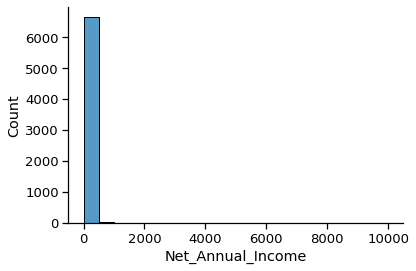

In [58]:
sns.displot(x='Net_Annual_Income', data=df, bins=20, height=4, aspect=1.5)

This is annoying, we don't really see much...

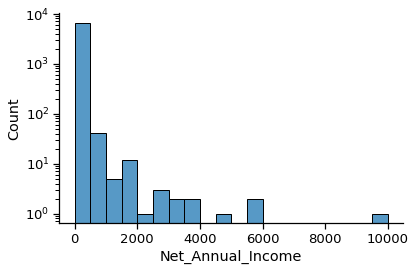

In [59]:
sns.displot(x='Net_Annual_Income', data=df, bins=20, 
            height=4, aspect=1.5, log_scale=(False, True))

Distribution for less than 100K revenue

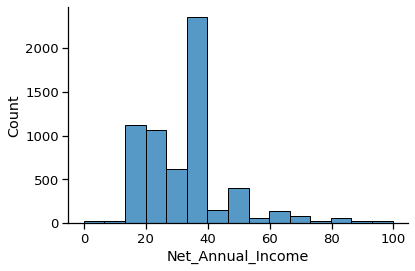

In [60]:
sns.displot(x='Net_Annual_Income', data=df[df['Net_Annual_Income'] < 100], 
            bins=15, height=4, aspect=1.5)

Distribution for less than 400K revenue

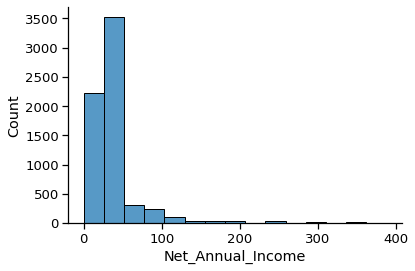

In [61]:
sns.displot(x='Net_Annual_Income', data=df[df['Net_Annual_Income'] < 400], 
            bins=15, height=4, aspect=1.5)

In [62]:
(df['Net_Annual_Income'] == 36.0).sum()

2265

In [63]:
income_counts = (
    pd.DataFrame({
        "income_category": df['Net_Annual_Income'].astype("category"),
        "income": df['Net_Annual_Income']
    })
    .groupby("income_category")
    .count()
    .reset_index()
    .rename(columns={"income": "#customers"})
    .sort_values(by="#customers", axis="index", ascending=False)
)
income_counts["%cummulative clients"] \
    = income_counts["#customers"].cumsum() / income_counts["#customers"].sum()

income_counts.iloc[:20].style.bar(subset=["%cummulative clients"], vmin=0, vmax=1)

- We have some overrepresented values (many possible explanations for this)
- To clean the data, we can, for instance, keep only the revenues between [10, 200], or leave it as such

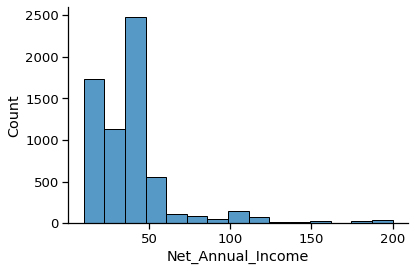

In [64]:
df = df[(df['Net_Annual_Income'] >= 10) & (df['Net_Annual_Income'] <= 200)]

sns.displot(x='Net_Annual_Income', data=df, bins=15, height=4, aspect=1.5)

# Some data visualization with `pandas` + `seaborn`

<AxesSubplot:xlabel='Educational_Level', ylabel='Net_Annual_Income'>

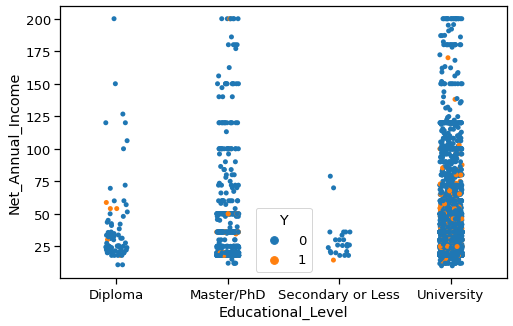

In [65]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='Educational_Level', y='Net_Annual_Income', hue='Y', 
              jitter=True, data=df)

<AxesSubplot:xlabel='Educational_Level', ylabel='Net_Annual_Income'>

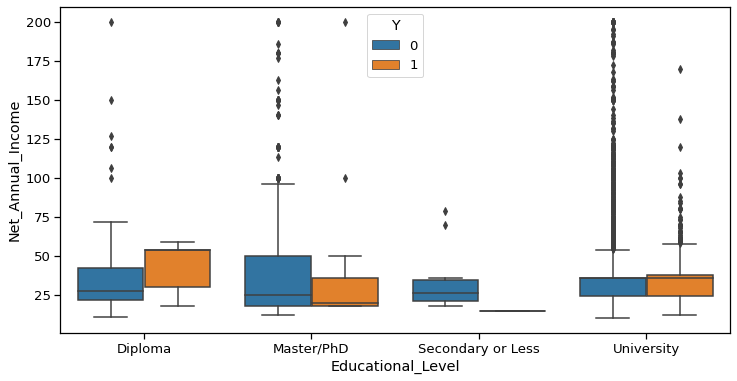

In [66]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Educational_Level', y='Net_Annual_Income', 
            hue='Y', data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='Net_Annual_Income'>

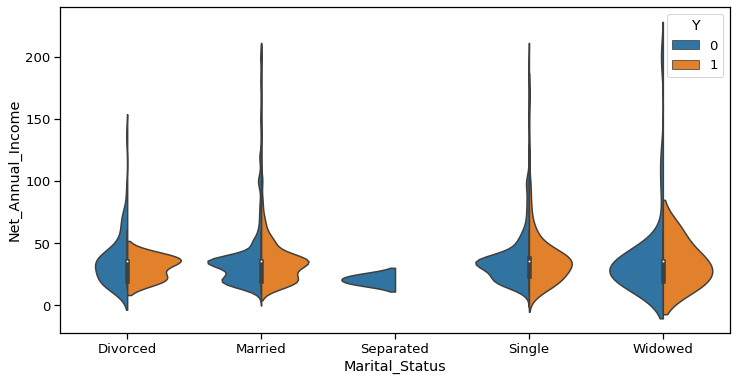

In [67]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Marital_Status', y='Net_Annual_Income', 
               hue='Y', split=True, data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

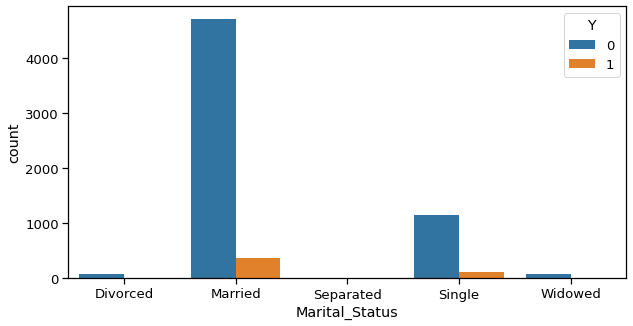

In [68]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital_Status', hue='Y', data=df)

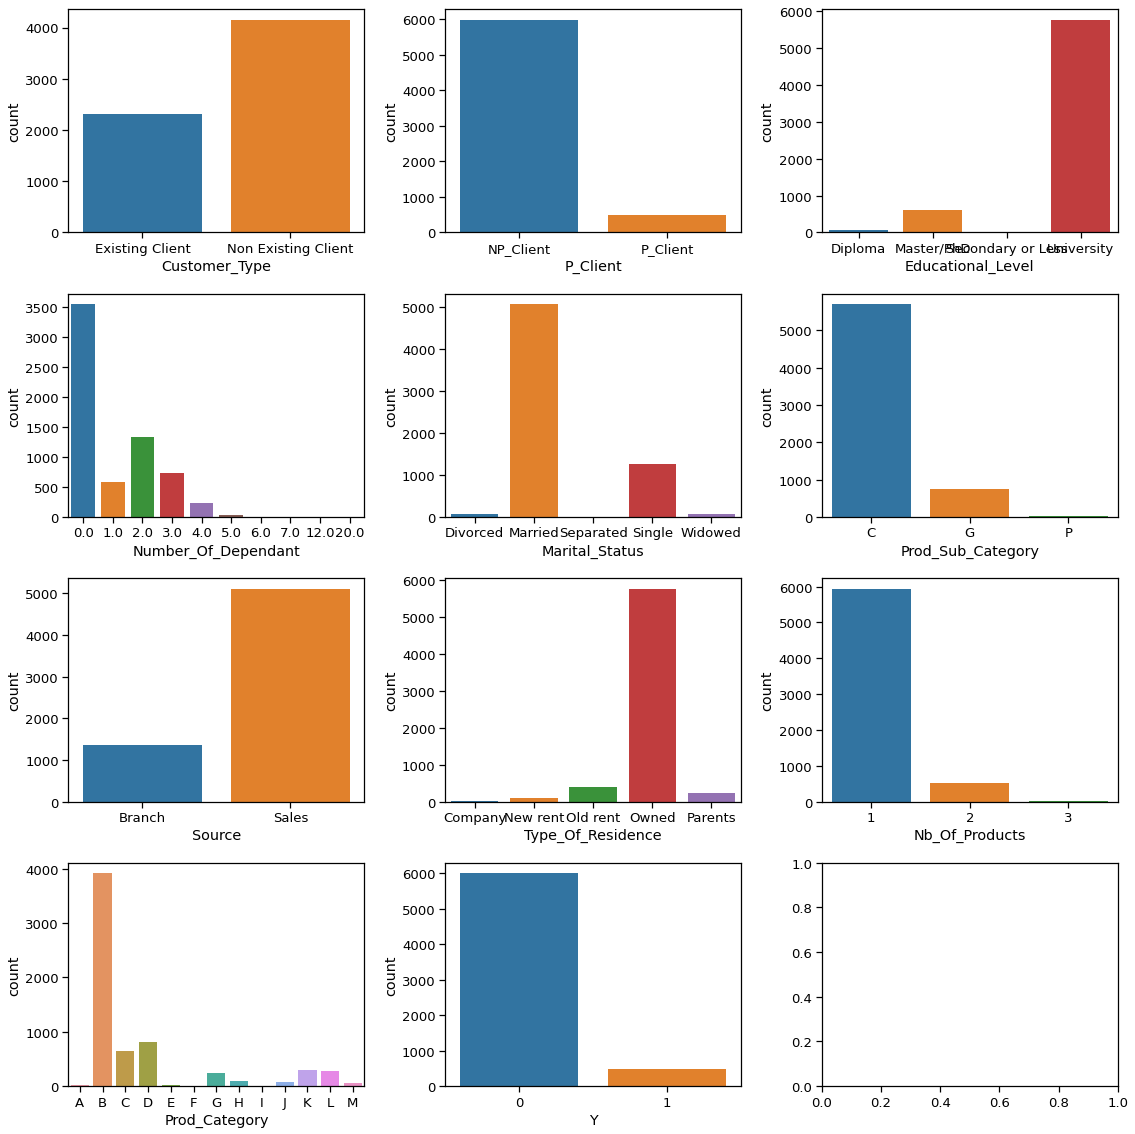

In [70]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))
columns = ['Customer_Type', 'P_Client', 'Educational_Level', 
           'Number_Of_Dependant', 'Marital_Status', 'Prod_Sub_Category',
           'Source', 'Type_Of_Residence', 'Nb_Of_Products', 
           'Prod_Category', 'Y']

for i, colname in enumerate(columns):
    sns.countplot(x=colname, data=df, ax=fig.axes[i])
plt.tight_layout()

# Final preparation of the dataset

In [73]:
# First we make lists of continuous, categorial and date features

cnt_featnames = [
    'Years_At_Residence',
    'Net_Annual_Income',
    'Years_At_Business',
    'Number_Of_Dependant'
]

cat_featnames = [
    'Customer_Type',
    'P_Client',
    'Educational_Level',
    'Marital_Status',
    'Prod_Sub_Category',
    'Source',
    'Type_Of_Residence',
    'Prod_Category',
    'Nb_Of_Products'
]

date_featnames = [
    'BirthDate',
    'Customer_Open_Date',
    'Prod_Decision_Date'
    #'Prod_Closed_Date'
]

## Creation of the features matrix

In [74]:
df[cnt_featnames].head()

Years_At_Residence  Net_Annual_Income  Years_At_Business  \
0                  10               36.0                3.0   
1                   1               36.0                1.0   
2                  12               18.0                2.0   
3                  10               36.0                1.0   
4                   3               36.0                1.0   

   Number_Of_Dependant  
0                  3.0  
1                  3.0  
2                  0.0  
3                  2.0  
4                  3.0

In [76]:
bin_features = pd.get_dummies(df[cat_featnames],
                              prefix_sep='#', drop_first=True)

In [77]:
bin_features.head()

Nb_Of_Products  Customer_Type#Non Existing Client  P_Client#P_Client  \
0               1                                  1                  0   
1               1                                  1                  0   
2               1                                  0                  1   
3               1                                  1                  0   
4               1                                  0                  0   

   Educational_Level#Master/PhD  Educational_Level#Secondary or Less  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   Educational_Level#University  Marital_Status#Married  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             1                       1   

   Marital_Status#Separated  Marital_Status#Single  Marital_Status#Widowed  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

   ...  Prod_Category#D  Prod_Category#E  Prod_Category#F  Prod_Category#G  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                1   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

   Prod_Category#H  Prod_Category#I  Prod_Category#J  Prod_Category#K  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Prod_Category#L  Prod_Category#M  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                1                0  

[5 rows x 29 columns]

In [78]:
cnt_features = df[cnt_featnames]
cnt_features.head()

Years_At_Residence  Net_Annual_Income  Years_At_Business  \
0                  10               36.0                3.0   
1                   1               36.0                1.0   
2                  12               18.0                2.0   
3                  10               36.0                1.0   
4                   3               36.0                1.0   

   Number_Of_Dependant  
0                  3.0  
1                  3.0  
2                  0.0  
3                  2.0  
4                  3.0

In [82]:
from pandas import Timestamp

def age(x):
    today = Timestamp.today()
    return (today - x).dt.days

date_features = df[date_featnames].apply(age, axis="index")
date_features.head()

BirthDate  Customer_Open_Date  Prod_Decision_Date
0      18614                3661                3656
1      16273                3635                3634
2      17394                4682                3863
3      17731                3615                3584
4      14417                3807                3854

In [85]:
today = Timestamp.today()
today

Timestamp('2022-01-26 10:09:00.926560')

In [88]:
tt = (today - df["BirthDate"]).loc[0]

In [91]:
(today - df["BirthDate"]).dt.days

0       18614
1       16273
2       17394
3       17731
4       14417
        ...  
6720    25213
6721    14489
6722    26032
6723    14263
6724    14491
Name: BirthDate, Length: 6473, dtype: int64

In [89]:
tt

Timedelta('18614 days 10:09:00.926560')

## Final features matrix

In [92]:
all_features = pd.concat([bin_features, cnt_features, date_features], axis=1)

In [93]:
all_features.columns

Index(['Nb_Of_Products', 'Customer_Type#Non Existing Client',
       'P_Client#P_Client', 'Educational_Level#Master/PhD',
       'Educational_Level#Secondary or Less', 'Educational_Level#University',
       'Marital_Status#Married', 'Marital_Status#Separated',
       'Marital_Status#Single', 'Marital_Status#Widowed',
       'Prod_Sub_Category#G', 'Prod_Sub_Category#P', 'Source#Sales',
       'Type_Of_Residence#New rent', 'Type_Of_Residence#Old rent',
       'Type_Of_Residence#Owned', 'Type_Of_Residence#Parents',
       'Prod_Category#B', 'Prod_Category#C', 'Prod_Category#D',
       'Prod_Category#E', 'Prod_Category#F', 'Prod_Category#G',
       'Prod_Category#H', 'Prod_Category#I', 'Prod_Category#J',
       'Prod_Category#K', 'Prod_Category#L', 'Prod_Category#M',
       'Years_At_Residence', 'Net_Annual_Income', 'Years_At_Business',
       'Number_Of_Dependant', 'BirthDate', 'Customer_Open_Date',
       'Prod_Decision_Date'],
      dtype='object')

In [94]:
all_features.head()

Nb_Of_Products  Customer_Type#Non Existing Client  P_Client#P_Client  \
0               1                                  1                  0   
1               1                                  1                  0   
2               1                                  0                  1   
3               1                                  1                  0   
4               1                                  0                  0   

   Educational_Level#Master/PhD  Educational_Level#Secondary or Less  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   Educational_Level#University  Marital_Status#Married  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             1                       1   

   Marital_Status#Separated  Marital_Status#Single  Marital_Status#Widowed  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

   ...  Prod_Category#K  Prod_Category#L  Prod_Category#M  Years_At_Residence  \
0  ...                0                0                0                  10   
1  ...                0                0                0                   1   
2  ...                0                0                0                  12   
3  ...                0                0                0                  10   
4  ...                0                1                0                   3   

   Net_Annual_Income  Years_At_Business  Number_Of_Dependant  BirthDate  \
0               36.0                3.0                  3.0      18614   
1               36.0                1.0                  3.0      16273   
2               18.0                2.0                  0.0      17394   
3               36.0                1.0                  2.0      17731   
4               36.0                1.0                  3.0      14417   

   Customer_Open_Date  Prod_Decision_Date  
0                3661                3656  
1                3635                3634  
2                4682                3863  
3                3615                3584  
4                3807                3854  

[5 rows x 36 columns]

In [103]:
df_debile = pd.DataFrame({"nom etudiant": ["yiyang", "jaouad", "mokhtar", "massil", "simon"], 
              "portable": [True, True, None, True, False]})

In [104]:
df_debile

nom etudiant portable
0       yiyang     True
1       jaouad     True
2      mokhtar     None
3       massil     True
4        simon    False

In [107]:
df_debile.index

RangeIndex(start=0, stop=5, step=1)

In [109]:
df_debile.dropna().index

Int64Index([0, 1, 3, 4], dtype='int64')

In [105]:
df_debile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nom etudiant  5 non-null      object
 1   portable      4 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


**VERY IMPORTANT**: we removed lines of data that contained missing values. The index of the dataframe is
    therefore not contiguous anymore

In [95]:
all_features.index.max()

6724

This could be a problem for later. So let's reset the index to get a contiguous one

In [96]:
all_features.shape

(6473, 36)

In [ ]:
all_features.reset_index(inplace=True, drop=True)

In [ ]:
all_features.head()

## Let's save the data using `pickle`

In [ ]:
import pickle as pkl

X = all_features
y = df['Y']

# Let's put eveything in a dictionary
df_pkl = {}
# The features and the labels
df_pkl['features'] = X
df_pkl['labels'] = y
# And also the list of columns we built above
df_pkl['cnt_featnames'] = cnt_featnames
df_pkl['cat_featnames'] = cat_featnames
df_pkl['date_featnames'] = date_featnames

with open("gro_training.pkl", 'wb') as f:
    pkl.dump(df_pkl, f)

In [ ]:
ls -al gro*

The preprocessed data is saved in a pickle file called `gro_training.pkl`.